<a href="https://colab.research.google.com/github/murillofnc22/labs-bairesdev-ml-training/blob/main/TarefaDeteccaoYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalando e importando Ultralytics, pacote oficial YOLO - modifiquei um pouco o exemplo da aula, peguei algo mais atualizado -**

In [1]:
!pip -q install ultralytics

from ultralytics import YOLO
import torch, sys

print("PyTorch:", torch.__version__, "CUDA available?", torch.cuda.is_available())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch: 2.8.0+cu126 CUDA available? True


# **Carregando o modelo YOLO11 Nano, pois ele é uma versão mais moderna, mais rápida, menor e tem mais acuracia que o YOLOv3.**

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 48.2ms
Speed: 11.8ms preprocess, 48.2ms inference, 211.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


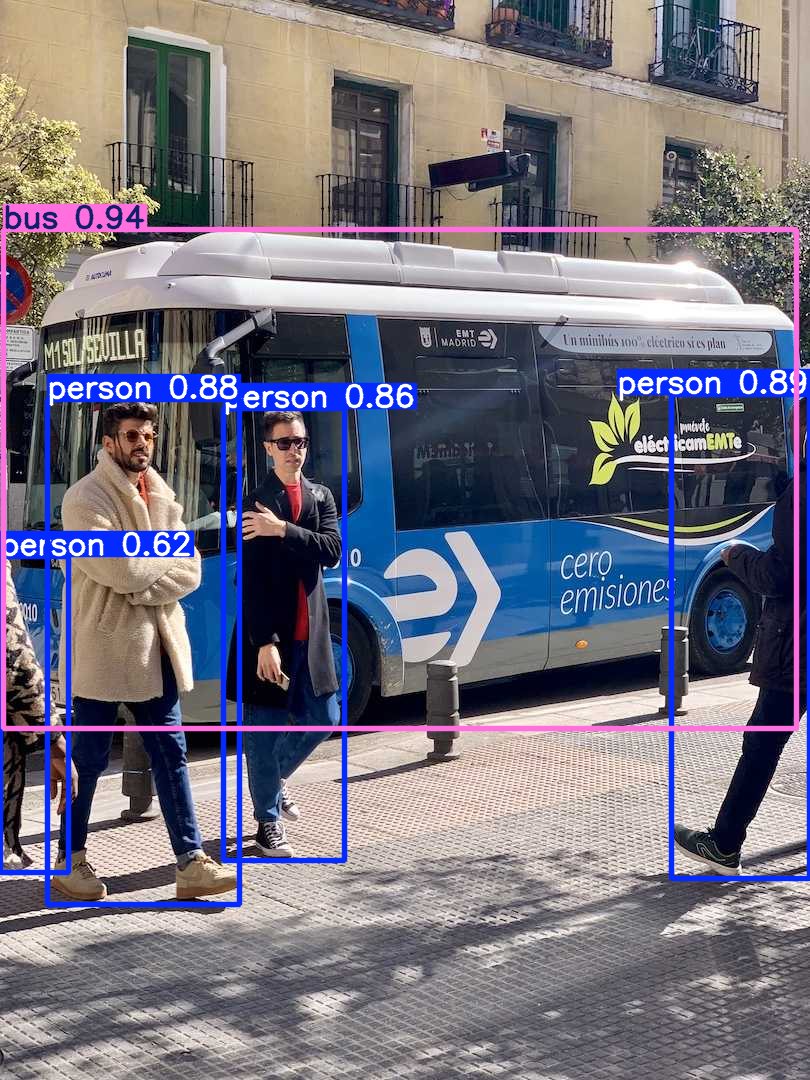

In [2]:
model = YOLO("yolo11n.pt")

results = model("https://ultralytics.com/images/bus.jpg", save=True, imgsz=640)
results[0].show()

# **Transfer learning com um COCO dataset.**

In [9]:
model = YOLO("yolo11n.pt")
model.train(data="coco128.yaml", epochs=10, imgsz=640, device=0)

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 325.2±104.2 MB/s, size: 52.5 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.57G      1.151      1.231      1.176         83        640: 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        128        929      0.728      0.574      0.679      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.62G      1.161      1.194      1.196        120        640: 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        128        929      0.727      0.594       0.69      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.64G      1.124      1.152      1.166        115        640: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        128        929      0.716      0.605      0.695      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.64G      1.129      1.179      1.168        116        640: 100%|██████████| 8/8 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        128        929      0.719      0.626      0.705      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.66G      1.105      1.127      1.176         68        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        128        929      0.725      0.628      0.714      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.66G      1.096        1.1      1.149         92        640: 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        128        929      0.713      0.645      0.721      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.66G      1.104      1.074      1.161        117        640: 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        128        929      0.727      0.651      0.723       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.67G      1.057      1.063      1.138         66        640: 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        128        929      0.736      0.654      0.727      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.68G      1.123      1.055      1.161        147        640: 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        128        929      0.738      0.654      0.729      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.68G       1.06      1.009       1.12        111        640: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        128        929      0.745      0.651      0.729      0.557



10 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all        128        929      0.745       0.65      0.729      0.557
                person         61        254      0.848      0.657      0.802      0.565
               bicycle          3          6      0.502      0.168      0.457      0.278
                   car         12         46      0.845      0.238      0.323      0.211
            motorcycle          4          5       0.85          1      0.995      0.856
              airplane          5          6      0.913          1      0.995      0.904
                   bus          5          7      0.863      0.714      0.758      0.684
                 train          3          3       0.64          1      0.913      0.789
                 truck          5         12      0.759        0.5      0.527      0.324
                  boat          2          6          1      0.596      0.836       0.51
         traffic light          4         14      0.543      0.174      0.222      0.174
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5fa44218e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

# **Avaliando o treinamento.**

In [10]:
metrics = model.val()
metrics.box.map, metrics.box.map50

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1806.9±440.3 MB/s, size: 53.4 KB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]


                   all        128        929      0.761      0.632      0.723      0.555
                person         61        254       0.87      0.638      0.806      0.566
               bicycle          3          6      0.534      0.167      0.436      0.263
                   car         12         46      0.914      0.233      0.326      0.208
            motorcycle          4          5      0.867          1      0.995      0.856
              airplane          5          6      0.922          1      0.995      0.904
                   bus          5          7      0.871      0.714      0.759      0.684
                 train          3          3      0.652          1      0.913      0.789
                 truck          5         12          1      0.405       0.56      0.358
                  boat          2          6      0.952        0.5      0.697      0.493
         traffic light          4         14      0.526      0.161      0.222      0.177
             stop sig

(np.float64(0.5553401604497366), np.float64(0.722522032521035))

# **Testando com a imagem de uma elefante.**


Found https://phangngaelephantpark.com/wp-content/uploads/2017/03/IMG_8907-2.jpg locally at IMG_8907-2.jpg
image 1/1 /content/IMG_8907-2.jpg: 640x448 1 person, 1 elephant, 9.7ms
Speed: 3.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train63


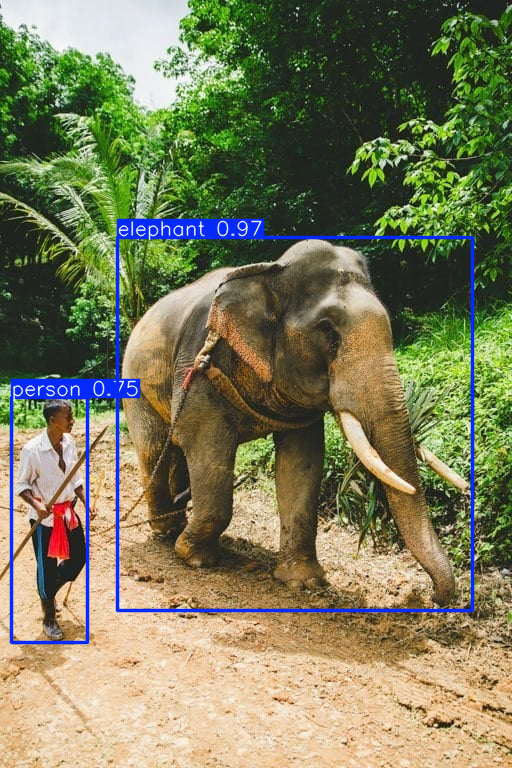

In [11]:
results = model("https://phangngaelephantpark.com/wp-content/uploads/2017/03/IMG_8907-2.jpg", save=True, imgsz=640)
results[0].show()

# **Agora um teste de um jogador com um taco de baseball**


Found https://upload.wikimedia.org/wikipedia/commons/6/62/Starlin_Castro_takes_a_practice_swing_for_the_Nationals_vs_the_Blue_Jays_at_Nationals_Park,_July_30,_2020_(All-Pro_Reels_Photography)_(50173515957)_(cropped).jpg locally at Starlin_Castro_takes_a_practice_swing_for_the_Nationals_vs_the_Blue_Jays_at_Nationals_Park,_July_30,_2020_(All-Pro_Reels_Photography)_(50173515957)_(cropped).jpg
image 1/1 /content/Starlin_Castro_takes_a_practice_swing_for_the_Nationals_vs_the_Blue_Jays_at_Nationals_Park,_July_30,_2020_(All-Pro_Reels_Photography)_(50173515957)_(cropped).jpg: 640x544 1 person, 1 sports ball, 2 baseball bats, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/train65


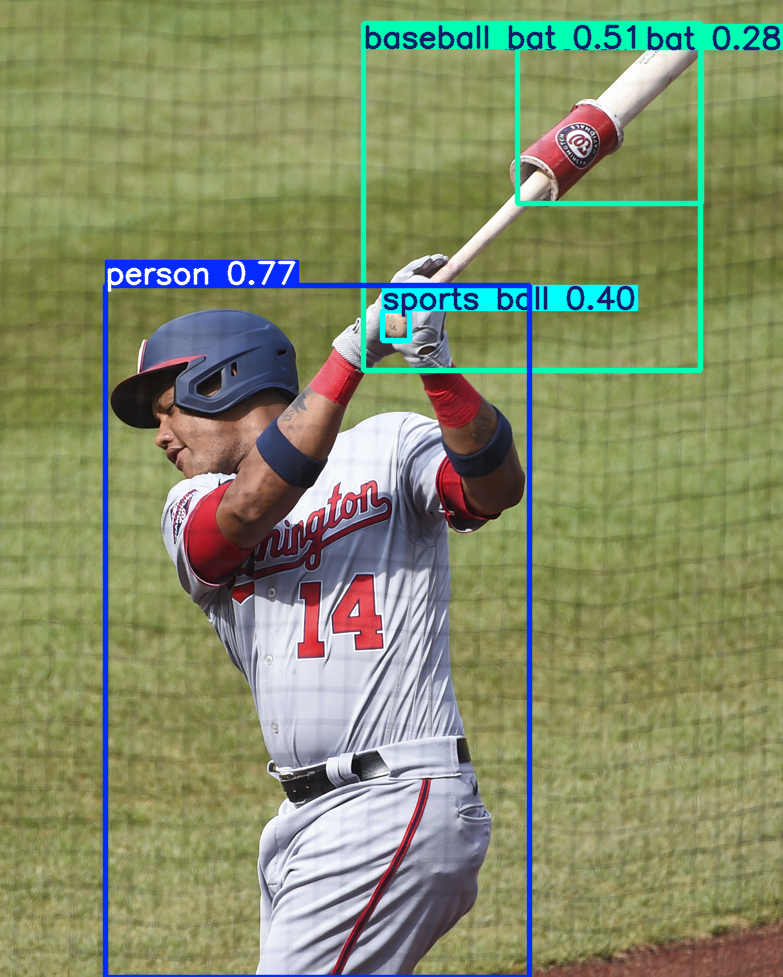

In [13]:
results = model("https://upload.wikimedia.org/wikipedia/commons/6/62/Starlin_Castro_takes_a_practice_swing_for_the_Nationals_vs_the_Blue_Jays_at_Nationals_Park%2C_July_30%2C_2020_%28All-Pro_Reels_Photography%29_%2850173515957%29_%28cropped%29.jpg", save=True, imgsz=640)
results[0].show()
